In [ ]:
import urllib.request
import zipfile
import os

try:
    os.mkdir("files")
except:
    pass

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2425a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

# Libraries: Pandas (two weeks)

## Python Programming for Engineers
### Tel-Aviv University / 0509-1820 / Fall 2025-2026

## Agenda: Pandas

- Introduction
- Counteries datasets
    - Data fetching
    - Data cleaning
    - Data analysis


## Introduction to Pandas

## What is the Pandas package using for?

- Calculate statistics and answer questions about (mostly tabular) data
    - e.g., What's the average, median, max, or min of each column?
- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.
- Store the cleaned, transformed data back into a **CSV**, other file or a database


### Dataframe

- Dataframe is the primary pandas data structure. 
- A dataframe is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). 
- **What is the main difference from a numpy array?**
- Pandas enables arithmetic operations on both the rows and the columns of a dataframe.
- It can be thought of as a dict-like container for Series objects. 


Slides 7-8

### Basic operations (1)

#### Create a dataframe from a dictionary

In [1]:
import pandas as pd
import numpy as np # This is not mandatory for using Pandas
import matplotlib.pyplot as plt # For plotting later

In [2]:
d = {'Name': ["Rick", "Morty"], 'Dimension': [137, 132]}
df = pd.DataFrame(data=d)
print('"Raw" display. This is how dataframes usually displayed on console')

"Raw" display. This is how dataframes usually displayed on console


In [3]:
print('formatted display (only in Jupyter Notebooks)')
display(df)

formatted display (only in Jupyter Notebooks)


,Name,Dimension
0,Rick,137
1,Morty,132


#### Create a dataframe from a numpy array

In [ ]:
df = pd.DataFrame([["Rick", 136, 1, True], ["Morty", 134, 3, True], ["Summer", 130, 7, False]], 
                  columns=['Name', 'Dimension', 'Encounters', 'Is original']) # Columns names 
display(df)

In [ ]:
print(df.columns)

In [ ]:
print(df["Name"])

 #### <span style='color:purple'>(1): What will be printed? </span>

In [ ]:
print(df["Dimension"] + df["Encounters"])

In [ ]:
df["Dimension"].dtype

In [ ]:
df2 = pd.DataFrame(np.array([[136, 1], [134, 3], [130, 7]]), 
                  columns=['Dimension', 'Encounters']) # Columns names

 #### <span style='color:purple'> (2): What will be printed? </span>

In [ ]:
df2["Dimension"].dtype

In [ ]:
df2 = pd.DataFrame(np.array([[136, 1], [134, 3], [130, 7]]), 
                  columns=['Dimension', 'Encounters']) # Column names

display(df2["Dimension"] + df2["Encounters"])

#### <span style='color:red'>Make sure your dataframe types are correct!</span>

#### `iloc` and `loc`

In [ ]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                  columns=['a', 'b', 'c'],index=[3, 4, 5])
display(df)

In [ ]:
display(df.iloc[:,:2]) 

In [ ]:
display(df.loc[:,:'b']) 

#### <span style='color:red'> Do not get confused between `df[]`, `df.loc[]` and `df.iloc[]`!</span>

#### Pandas' classes

 #### <span style='color:purple'> (3): What will be printed? </span>

In [ ]:
print(type(df))
print(type(df.iloc[0]))
print(type(df.iloc[:,0]))

Slides 9-10

## Example: Countries dataset

### Analysis steps

0. **Install pandas with anaconda as described <a href=http://courses.cs.tau.ac.il/pyProg/2122a/resources/pycharm%20tutorial.pdf>here (via Pycharm)</a> or <a href=https://docs.anaconda.com/anaconda/navigator/tutorials/pandas/>here (on windows)</a>**
1. Get basic information
2. Data cleaning – fill missing data
3. Basic data analysis
4. Data Visualization


Slides 11-14

## 1. Get basic information (and some more basic operations)

#### Read a csv

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv")

#### Write dataframe to csv

In [ ]:
df.to_csv("files/countries-of-the-world_out.csv")

#### Print the top 3 rows using the `head` function

In [ ]:
display(df.head(3))

#### <span style='color:red'>Note that NaN on the second row!</span>

In [ ]:
df.info()

Slides 15-23

## 2. Data cleaning

### fill missing values

#### Option 1: replace nan values with 0 (or any other constant value)

In [ ]:
df=pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area"]]
display(df)
df = df.fillna(0)
display(df)

#### Option 2: replace nan values with the average of the column

In [ ]:
df=pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area"]]
display(df)
df['Population']=df['Population'].fillna(df.loc[:,'Population'].mean())
print(df['Population'].mean())
display(df)

#### Option 3: drop all rows that have any NaN value

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area"]]
display(df)
df = df.dropna()
display(df)

### Convert Square Miles to Square Kilometers

#### Formula: 1 Square Mile =2.58 Square Kilometers

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv")
df['Area kilometers'] = df['Area'].apply(lambda x: x*2.58) # Apply this lambda function on every cell in the Area column
display(df.loc[:,["Area kilometers","Area"]])

#### Add a new column

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area", "Birthrate", "Deathrate"]]
display(df)

df["Growing Rate"] = df.apply(lambda row: row["Birthrate"] - row["Deathrate"], axis=1)
display(df)

#### A detailed (and longer) version

In [ ]:
def get_growing_rate(row):
    return row["Birthrate"] - row["Deathrate"]

In [ ]:
df["Growing Rate"] = df.apply(get_growing_rate, axis=1)
display(df)

#### Add a new country (row) to the dataframe

 #### <span style='color:purple'> (4): What will be printed? </span>

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area"]]
israel = pd.DataFrame([{"Country":"Israel", "Region":"ASIA","Population": 8000000}])
df = pd.concat((df, israel), ignore_index=True)
display(df.iloc[4].loc['Area'])

In [ ]:
display(df)

#### NaNs

In [ ]:
nan_val=df.iloc[4].loc['Area']
print(nan_val)

#### <span style='color:purple'>(5): What will be printed? </span>

In [ ]:
print(np.nan=="nan")
print(np.nan=="NaN")
print(nan_val==np.nan)
print(np.isnan(nan_val))
print(pd.isnull(nan_val))
print(np.isnan(np.nan))
print(pd.isnull(np.nan))

#### Delete the Area column

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area"]]
display(df)

df = df.drop("Area",axis=1) 
# Axes 1 for column.  Use df.drop([“A”, “B”], 1) to drop both the A and B columns

display(df)

#### Delete the country Angola

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area"]]
df = df[df.Country != "Angola"]
display(df)
# This is equivalent
# df = df[df['Country'] != "Angola"]

#### Leave only country Angola <u>and</u> Afghanistan

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area"]]
display(df)

countries = ["Angola","Afghanistan"]
df = df[df.Country.isin(countries)]
display(df)

 #### What will happen if we add `~` before `isin` ?

 #### <span style='color:purple'>(6): Which countries will be printed?</span>

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").loc[[0,1,2,3],["Country","Region","Population","Area"]]
display(df)

countries = ["Angola","Afghanistan"]
df = df[~df.Country.isin(countries)] # ~ is for not. 
display(df.loc[:,"Country"])

### Join Tables

- Given a new table with the same column names, merge the two tables into a single table

In [ ]:
df1 = pd.read_csv("files/countries-of-the-world.csv").iloc[:3]
df2 = pd.read_csv("files/countries-of-the-world.csv").iloc[3:6]
display(df1)
display(df2)
frames = [df1, df2]
result = pd.concat(frames, axis=0)
display(result)

#### Inner join – consider only the intersection of the tables
- How many rows are in the intersection?

#### Outer join – consider the union of the table, fill with Nan missing values.
- How many rows are in the union?

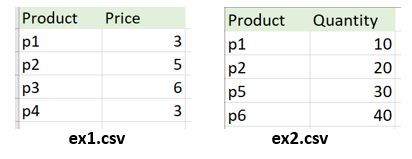

In [ ]:
df1 = pd.read_csv("files/ex1.csv")
display(df1)
df2 = pd.read_csv("files/ex2.csv")
display(df2)

In [ ]:
pd.concat([df1,df2], axis=1)

In [ ]:
df1 = pd.read_csv("files/ex1.csv")
display(df1)
df2 = pd.read_csv("files/ex2.csv")
display(df2)

In [ ]:
inner = pd.merge(df1, df2, on='Product', how = 'outer')
display(inner)

 #### <span style='color:purple'> Kahoot! (7): How many rows in the printed table?</span>

In [ ]:
outer = pd.merge(df1, df2, on='Product', how = 'outer')
display(outer)

Slides 24-

## 3. Data analysis

####  Which country has the largest population?
1. Find the **label** of the row with the maximum value in the population column (idxmax())
2. Get the country name of the row with the obtained **label** (loc) 

In [ ]:
label_max_pop = df["Population"].idxmax()
display(df.loc[label_max_pop]["Country"])

#### How many countries have more than 1M people? 
1. Select all rows with Population > 1,000,000
2. Count the number of selected rows (use len() to get the num of rows)

In [ ]:
print(len(df.loc[df['Population'] > 1000000]))

In [ ]:
print(len(df[df['Population'] > 1000000]))

In [ ]:
print((df['Population'] > 1000000).sum())

#### How many countries in **Oceania** have more than 1M peoples? 
- Select all countries from Oceania, with Population > 1,000,000
- Count the number of selected rows (use len() to get the num of rows)

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").loc[:,["Country","Region","Population","Area"]]
df = df[(df['Population'] > 1000000) & (df['Region'] == "OCEANIA")]
display(df)
print(len(df))

#### Get all countries in the Oceania with Deathrate > 7

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv")
df = df[(df['Region'] == "OCEANIA") & (df['Deathrate'] > 7)]
display(df)

#### Sort the countries according to the population size

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv")
df = df.sort_values(['Population'], ascending=True)
display(df)

#### How to sort countries with the same/NaN population values?

#### Break ties according to area size

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv")
df = df.sort_values(['Population', 'Area'], ascending=True)
display(df)

#### `groupby` 

#### What is the average population in each region? 
- Groupby region
- Get the mean of the population column in every group

In [ ]:
display(df.groupby(['Region'])['Population'].mean())

#### Which country in each region has the largest population?
1. Grouby region
2. Get the country with the maximum population in every group


In [ ]:
regions = df.groupby(["Region"])
for name, group in regions:
    label_max = group["Population"].idxmax()
    print(name, df.loc[label_max]["Country"])

#### Yet, better:

In [ ]:
display(df.loc[df.groupby(["Region"])['Population'].idxmax()])

#### Print the highest mean Deathrate among all regions 
- Compute the mean deathrate per region
- Get the maximum value


In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv")
regions = df.groupby(['Region'])
print(regions['Deathrate'].mean().max())

display(df)

## 4. Data visualization

#### Reminder from the lecture:
Motivation - we want to visualize our data in a way that convey the main point that stems from the data

- e.g., show difference between two large groups of numbers


Use Matplotib!

In [ ]:
import matplotlib.pyplot as plt

#### Code template for drawing a figure

```python
fig, ax = plt.subplots(figsize=(4,3)) ## Create canvas. figsize=(4,3) sets the size of the figure (optional)
## Draw your plot here
plt.legend() # plot the names that each color represents (optional)
plt.show() # Visualize plot
```

### Objective: visualize Birthrate and Deathrate

#### Curves of Birthrate and Deathrate

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").sample(100) # sampling 100 lines at random

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Birthrate', 'Deathrate'] 
ax.plot(range(len(df)), df.loc[:,columns[0]], label=columns[0])
ax.plot(range(len(df)), df.loc[:,columns[1]], label=columns[1])
plt.legend()
plt.show()

#### Caveat
- Curves are designed to describe the link between two **ordered** variables 
- No order in x-axis (counteries) 

#### Scatter plot of Birthrate and Deathrate

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Birthrate', 'Deathrate'] 
ax.scatter(df.loc[:,columns[0]], df.loc[:,columns[1]])
ax.set_xlabel(columns[0]) # name X-axis
ax.set_ylabel(columns[1]) # name y-axis
plt.show()

#### Plot the histogram of the Birthrate column

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv")
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(df.loc[:,'Birthrate'], label="Birthrate")
ax.set_xlabel("Birthrate") # Name X-axis
ax.set_ylabel("Count") # Name Y-axis
ax.legend()    
plt.show()

#### Plot the histograms of the Birthrate and the Deathrate columns in the same figure

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv")
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.hist(df["Birthrate"], alpha=0.5, label='Birthrate') # alpha for transparent colors
ax.hist(df["Deathrate"], alpha=0.5, label='Deathrate') # alpha for transparent colors
ax.set_xlabel('Rate')
ax.set_ylabel('Count')
ax.legend()
plt.show()

Note that the bars are not in the same width. This can be solved (but is out of scope)

#### Plots bars of the country's growing rate (Birthrate - Deathrate) in <u>descending order</u>

In [ ]:
df = pd.read_csv("files/countries-of-the-world.csv").head(7)
fig, ax = plt.subplots(figsize=(10,3))
df=df.loc[:,['Country', 'Birthrate','Deathrate']].dropna(axis=0)
df['Growing rate']=(df.loc[:,'Birthrate']-df.loc[:,'Deathrate'])
df=df.sort_values(by='Growing rate', ascending=False)
ax.bar(df['Country'], df['Growing rate'])
ax.set_ylabel('Growing rate')
plt.show()

## Questions from previous exams

[Exam 2024 semester B Moed B](https://courses.cs.tau.ac.il/pyProg/2425a/exams/exam2324b_moedB.pdf)

E.

In [ ]:
def read_missions_file(file_name):
    return pd.read_csv(file_name).loc[:100][["Kingdom", "Bounty", "Expenses", "Duration"]]

df = read_missions_file("files/witcher_1.csv") # the files/ was added for technical reason. It can be ignored. 
display(df)

F1.

In [ ]:
def add_daily_gain_col(missions):
    missions["Daily Gain"] = (missions["Bounty"] - missions["Expenses"]) / missions["Duration"]
    
add_daily_gain_col(df)
display(df)

F2.

In [ ]:
def get_by_best_daily_gain(missions):
    return missions.loc[missions.groupby('Kingdom')['Daily Gain'].idxmax(), ['Kingdom', 'Bounty']]
    
get_by_best_daily_gain(df)

G

In [ ]:
def fuse_missions(dfs):
    return pd.concat(dfs, axis=0, ignore_index=True).sort_values(by="Bounty", ascending=False)

df2 = read_missions_file("files/witcher_2.csv")
df = read_missions_file("files/witcher_1.csv")

df3 = fuse_missions([df, df2])
display(df3)

H.

In [ ]:
df2=pd.DataFrame([{'Kingdom': 'Temeria', 'Bounty': 1000, 'Ruler': 'Foltest', 'Expenses': 250, 'Duration': 5, 'Danger level': 7},
   {'Kingdom': 'Redania', 'Bounty': 1500, 'Ruler': 'Radovid', 'Expenses': 500, 'Duration': 3, 'Danger level': 10},
   {'Kingdom': 'Kaedwen', 'Bounty': 500, 'Ruler': 'Henslet', 'Expenses': 100, 'Duration': 7, 'Danger level': 3},
   {'Kingdom': 'Cintra', 'Bounty': 2500, 'Ruler': 'Calanthe', 'Expenses': 2000, 'Duration': 3, 'Danger level': 2},
   {'Kingdom': 'Temeria', 'Bounty': 1000, 'Ruler': 'Foltest', 'Expenses': 50, 'Duration': 4, 'Danger level': 7},
   {'Kingdom': 'Cintra', 'Bounty': 750, 'Ruler': 'Calanthe', 'Expenses': 2000, 'Duration': 3, 'Danger level': 2},
   {'Kingdom': 'Kaedwen', 'Bounty': 500, 'Ruler': 'Henslet', 'Expenses': 200, 'Duration': 3, 'Danger level': 3}])

display(df2)

In [ ]:
df2.loc[~(df2['Duration']==df2['Duration'].max()), 'Kingdom']

## Pandas summary

### We saw how to:
- Create a dataframe (from a file, dict, numpy array)
- basic information (`head()`, `tail()`, `dtypes`, `info()`)
- Clean the data (add/remove columns/rows, `fillna()`)
- Merge tables (`concat()`, `merge()`)
- Analyze the dataset (select rows based on a condition, `groupby()`, `mean()`, `idxmax()`, etc.)
- Visualize the data (`hist()`, `plot()`, `scatter()`, `boxplot()`, `scatter()`, `bar()`)


#### For more info visit the pandas <a href='https://pandas.pydata.org/pandas-docs/stable/'>documentation</a> website. 
